In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ee-769-assignment1/train.csv
/kaggle/input/ee-769-assignment1/test.csv
/kaggle/input/ee-769-assignment1/sample_submission.csv


In [2]:
#Importing libraries

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [3]:
train = pd.DataFrame(pd.read_csv('../input/ee-769-assignment1/train.csv'))
test = pd.DataFrame(pd.read_csv('../input/ee-769-assignment1/test.csv'))

In [4]:
# Description of statistic features (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 
# 3rd Quartile and Maximum)
train.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,...,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,...,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,...,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,...,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


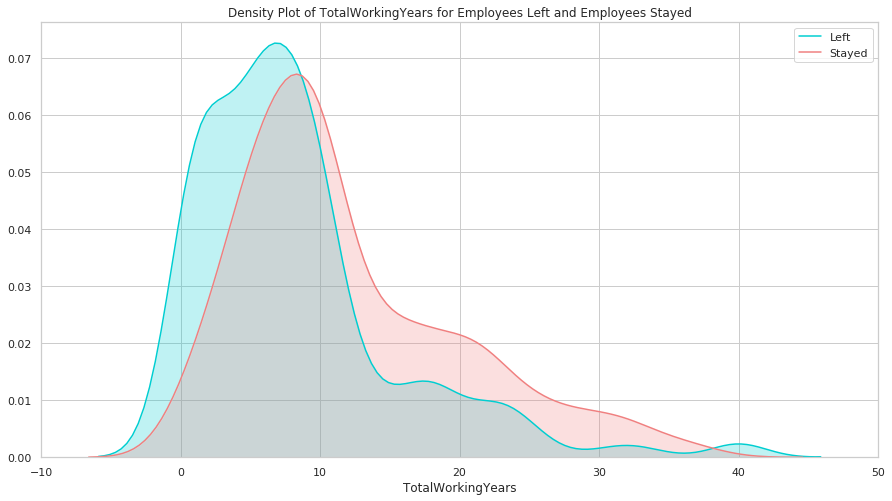

In [5]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["TotalWorkingYears"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["TotalWorkingYears"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of TotalWorkingYears for Employees Left and Employees Stayed')
ax.set(xlabel='TotalWorkingYears')
plt.xlim(-10,50)
plt.show()

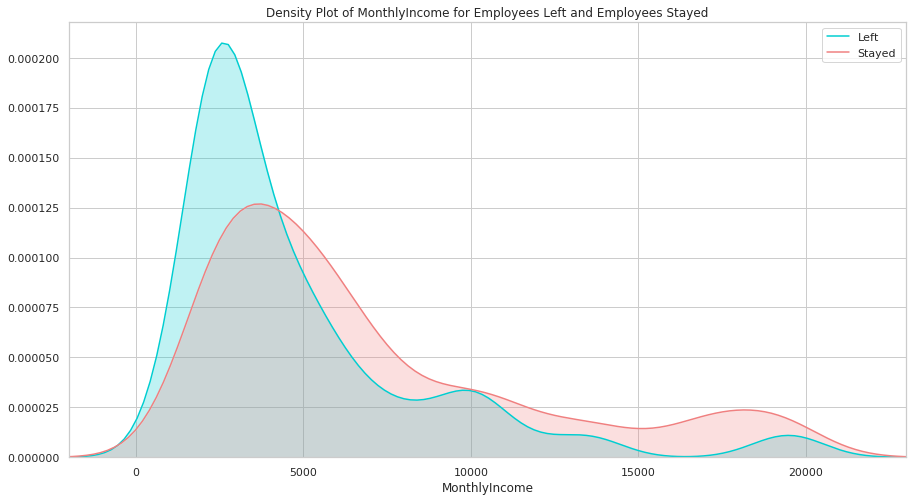

In [6]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["MonthlyIncome"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["MonthlyIncome"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of MonthlyIncome for Employees Left and Employees Stayed')
ax.set(xlabel='MonthlyIncome')
plt.xlim(-2000,23000)
plt.show()

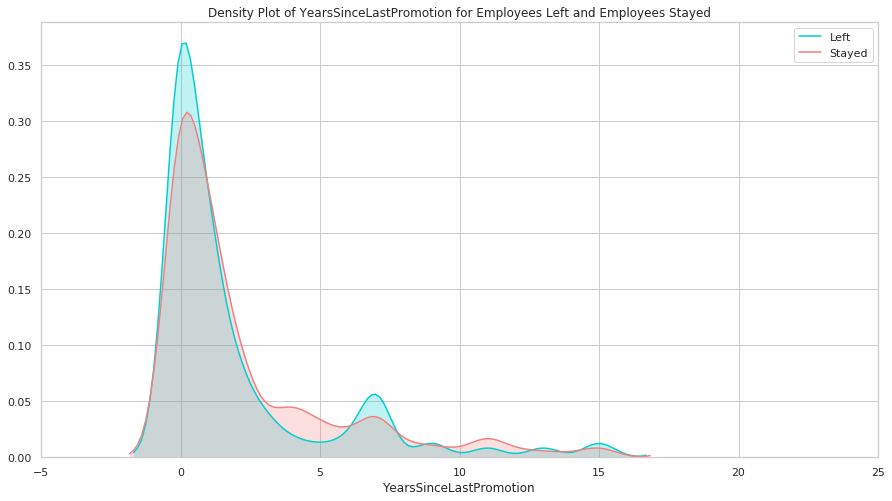

In [7]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["YearsSinceLastPromotion"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["YearsSinceLastPromotion"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of YearsSinceLastPromotion for Employees Left and Employees Stayed')
ax.set(xlabel='YearsSinceLastPromotion')
plt.xlim(-5,25)
plt.show()

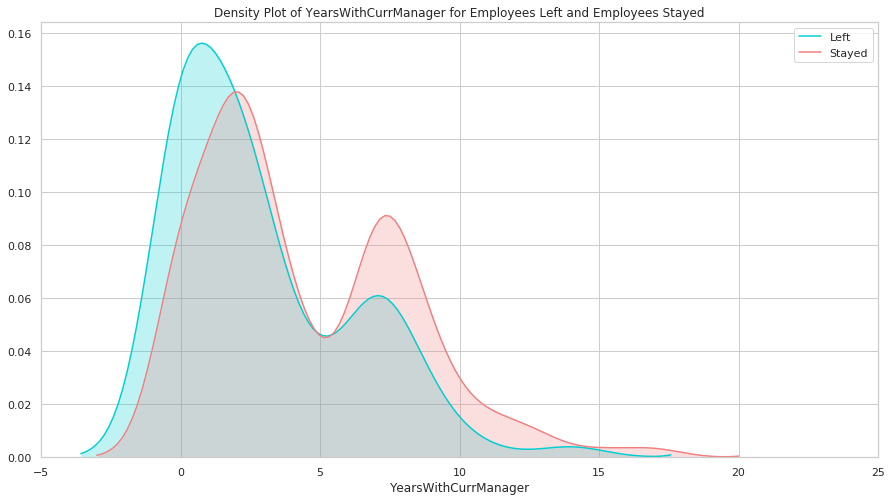

In [8]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["YearsWithCurrManager"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["YearsWithCurrManager"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of YearsWithCurrManager for Employees Left and Employees Stayed')
ax.set(xlabel='YearsWithCurrManager')
plt.xlim(-5,25)
plt.show()

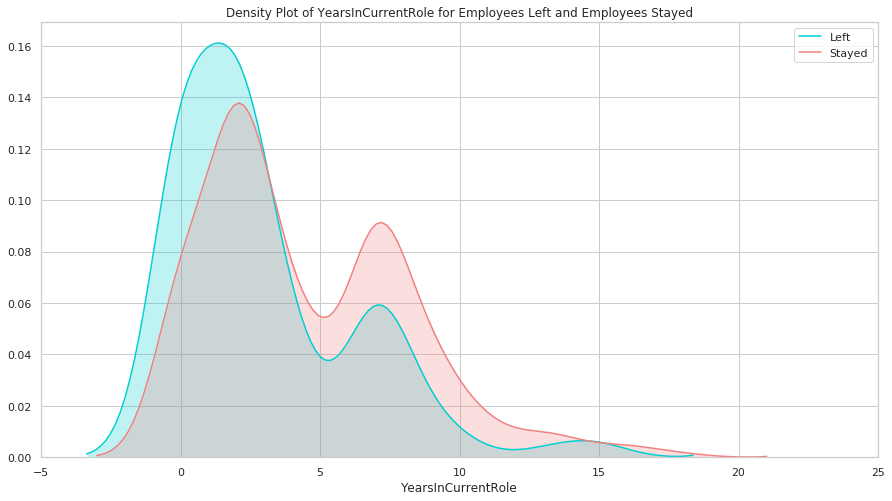

In [9]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["YearsInCurrentRole"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["YearsInCurrentRole"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of YearsInCurrentRole for Employees Left and Employees Stayed')
ax.set(xlabel='YearsInCurrentRole')
plt.xlim(-5,25)
plt.show()

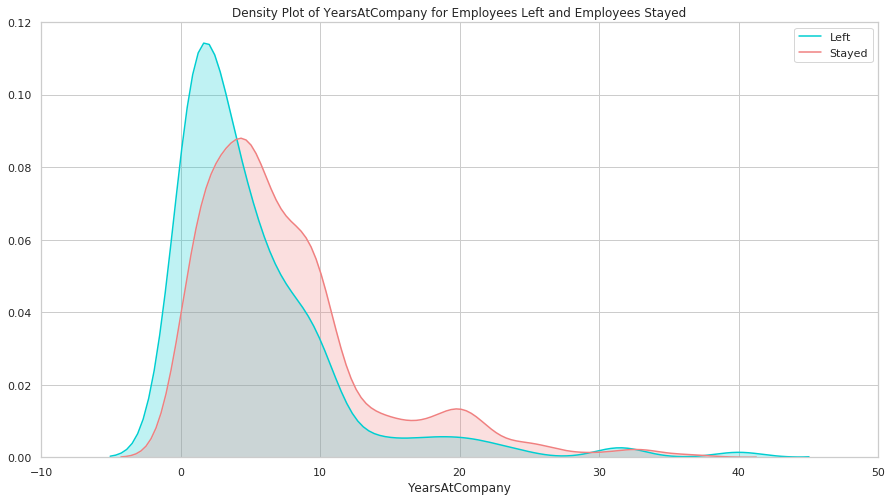

In [10]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["YearsAtCompany"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["YearsAtCompany"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of YearsAtCompany for Employees Left and Employees Stayed')
ax.set(xlabel='YearsAtCompany')
plt.xlim(-10,50)
plt.show()

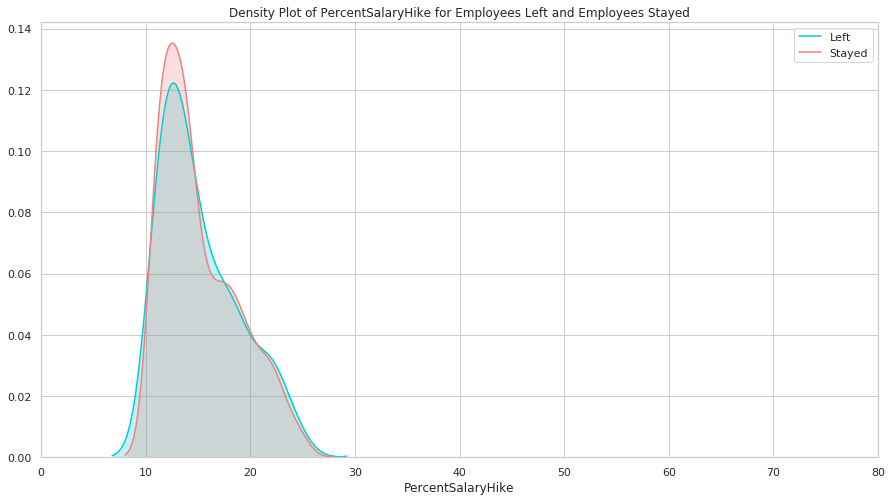

In [11]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["PercentSalaryHike"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["PercentSalaryHike"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of PercentSalaryHike for Employees Left and Employees Stayed')
ax.set(xlabel='PercentSalaryHike')
plt.xlim(0,80)
plt.show()

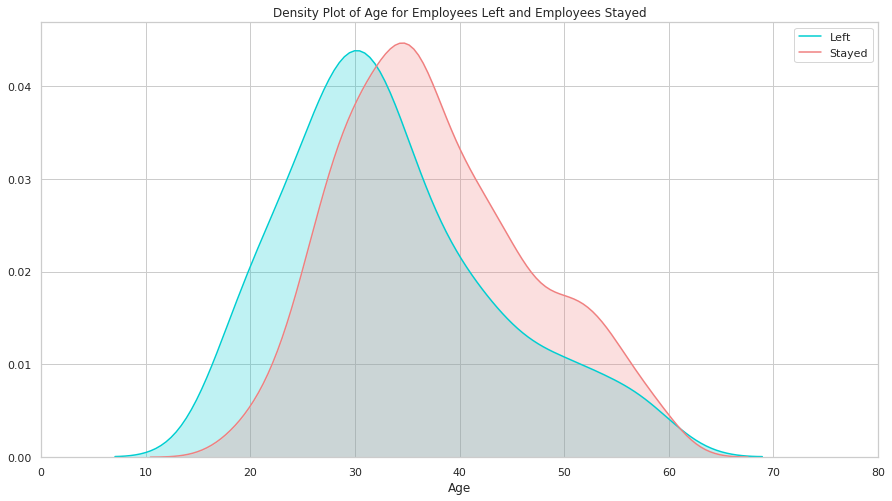

In [12]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["Age"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Age"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of Age for Employees Left and Employees Stayed')
ax.set(xlabel='Age')
plt.xlim(0,80)
plt.show()

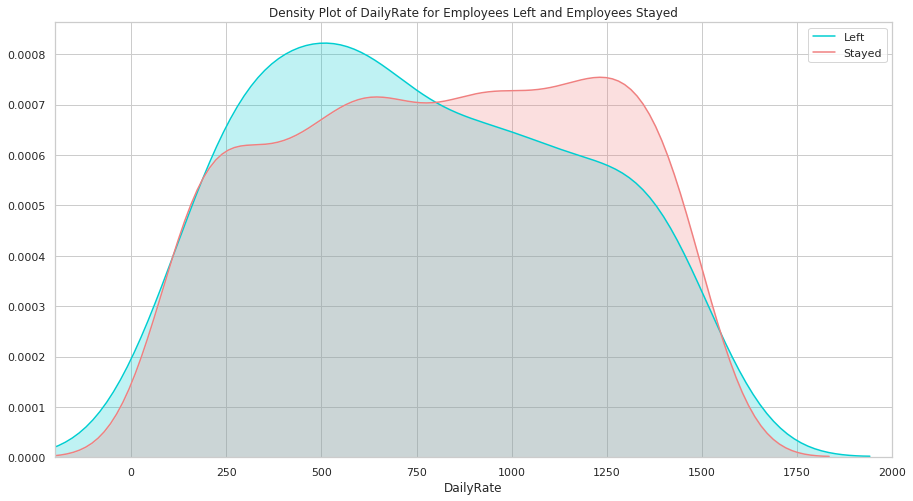

In [13]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["DailyRate"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["DailyRate"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of DailyRate for Employees Left and Employees Stayed')
ax.set(xlabel='DailyRate')
plt.xlim(-200,2000)
plt.show()

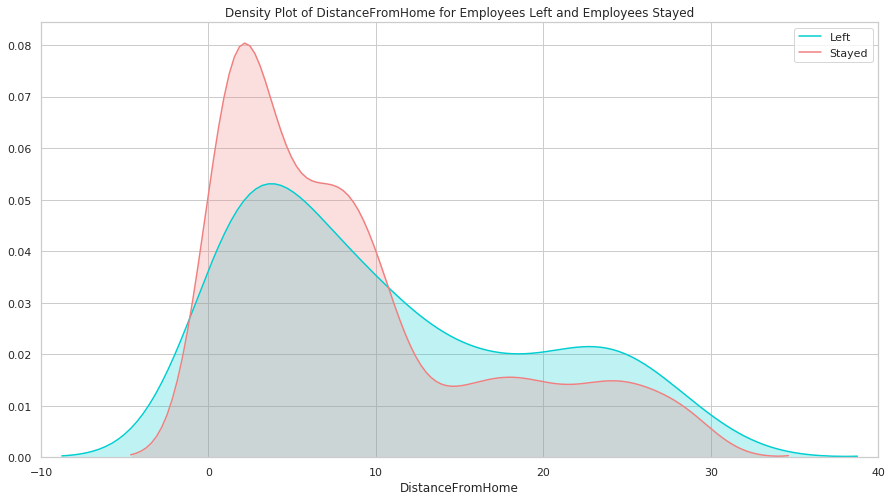

In [14]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["DistanceFromHome"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["DistanceFromHome"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of DistanceFromHome for Employees Left and Employees Stayed')
ax.set(xlabel='DistanceFromHome')
plt.xlim(-10,40)
plt.show()

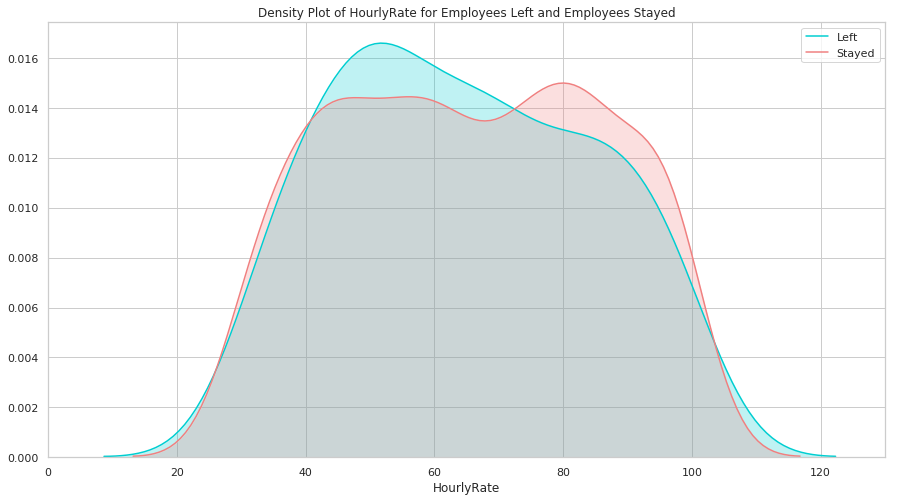

In [15]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["HourlyRate"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["HourlyRate"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of HourlyRate for Employees Left and Employees Stayed')
ax.set(xlabel='HourlyRate')
plt.xlim(0,130)
plt.show()

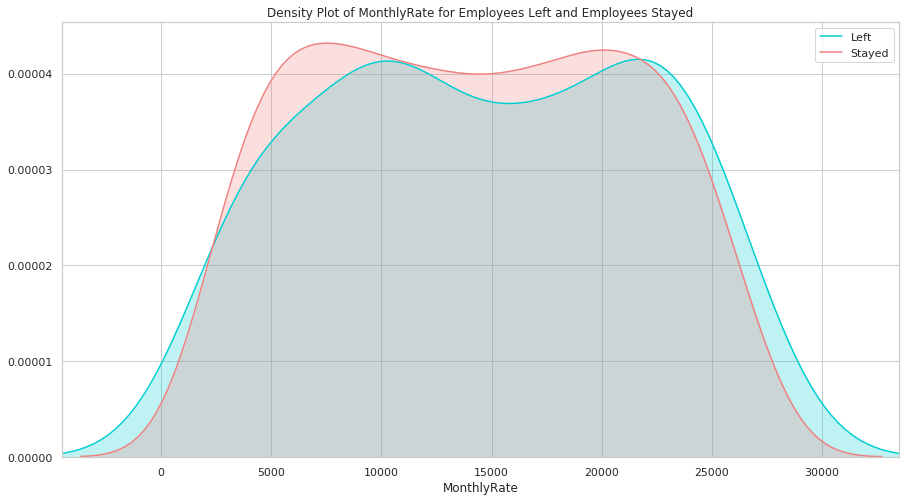

In [16]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train["MonthlyRate"][train.Attrition == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["MonthlyRate"][train.Attrition == 0], color="lightcoral", shade=True)
plt.legend(['Left', 'Stayed'])
plt.title('Density Plot of MonthlyRate for Employees Left and Employees Stayed')
ax.set(xlabel='MonthlyRate')
plt.xlim(-4500,33500)
plt.show()

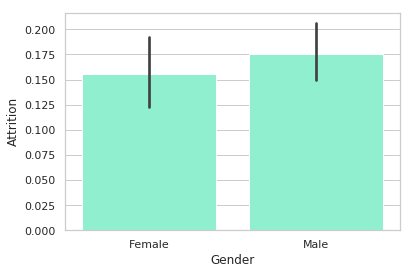

In [17]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('Gender', 'Attrition', data=train, color="aquamarine")
plt.show()

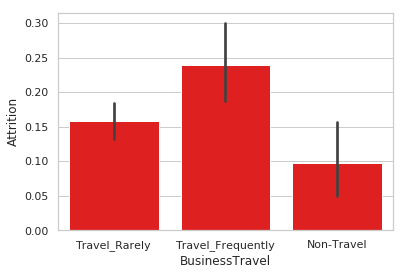

In [18]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('BusinessTravel', 'Attrition', data=train, color="red")
plt.show()

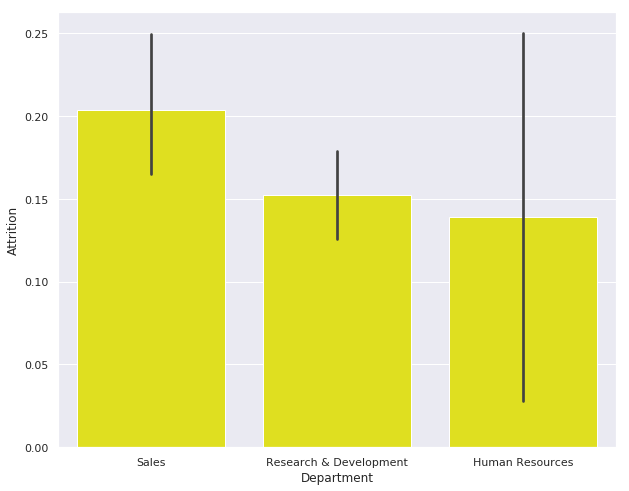

In [73]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('Department', 'Attrition', data=train, color="yellow")
plt.show()

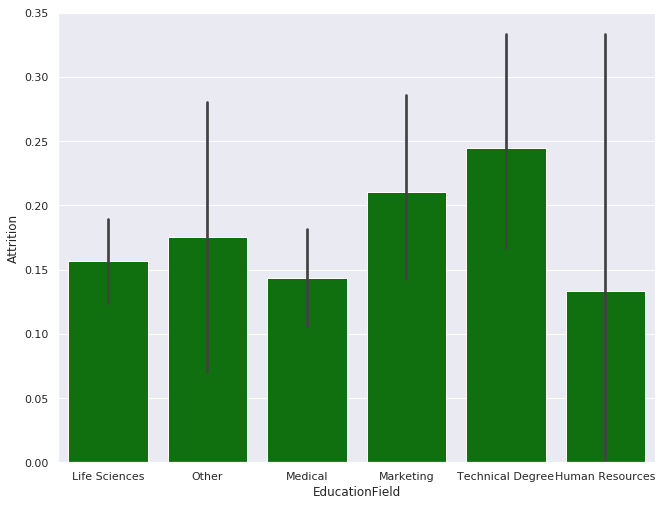

In [66]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.barplot('EducationField', 'Attrition', data=train, color="green")
plt.show()

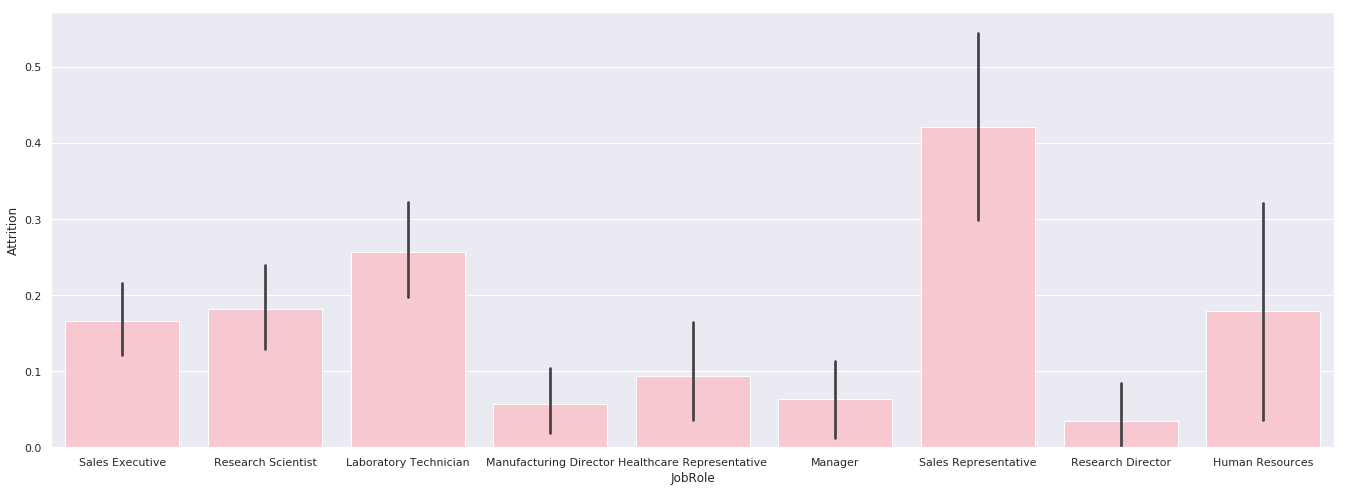

In [72]:
sns.set(rc={'figure.figsize':(23,8)})
sns.barplot('JobRole', 'Attrition', data=train, color="pink")
plt.show()

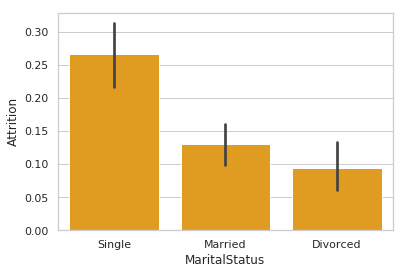

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('MaritalStatus', 'Attrition', data=train, color="orange")
plt.show()

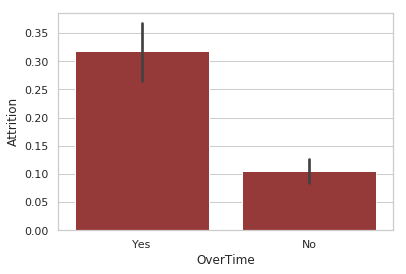

In [23]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('OverTime', 'Attrition', data=train, color="brown")
plt.show()

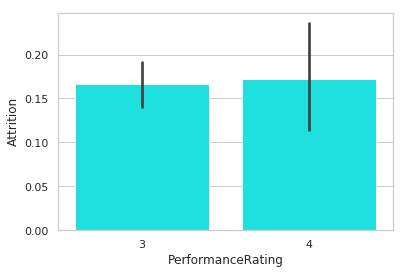

In [24]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('PerformanceRating', 'Attrition', data=train, color="cyan")
plt.show()

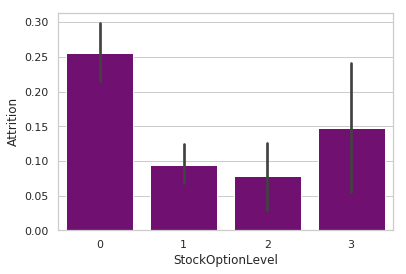

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('StockOptionLevel', 'Attrition', data=train, color="purple")
plt.show()

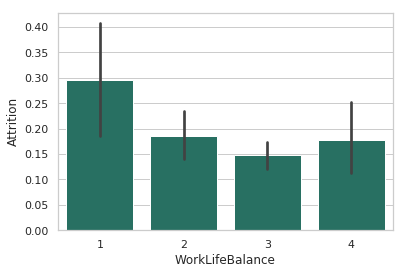

In [26]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('WorkLifeBalance', 'Attrition', data=train, color="#1C7C69")
plt.show()

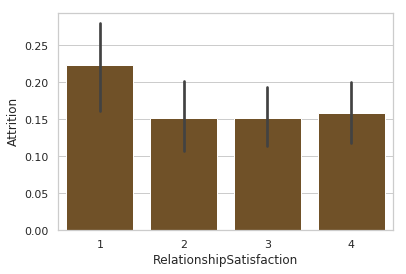

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('RelationshipSatisfaction', 'Attrition', data=train, color="#7C521C")
plt.show()

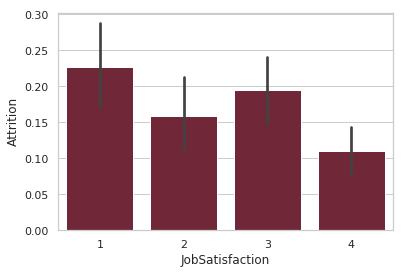

In [28]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('JobSatisfaction', 'Attrition', data=train, color="#7C1C32")
plt.show()

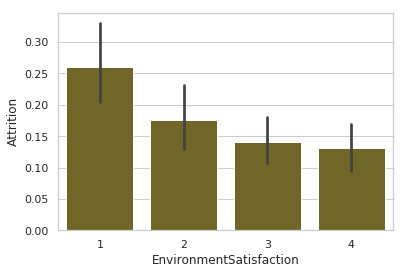

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('EnvironmentSatisfaction', 'Attrition', data=train, color="#7C6F1C")
plt.show()

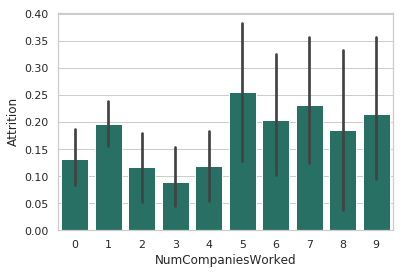

In [30]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('NumCompaniesWorked', 'Attrition', data=train, color="#1C7C6C")
plt.show()

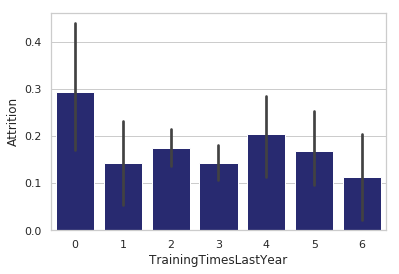

In [31]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('TrainingTimesLastYear', 'Attrition', data=train, color="#1C1F7C")
plt.show()

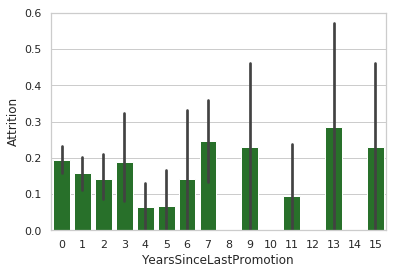

In [32]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('YearsSinceLastPromotion', 'Attrition', data=train, color="#1C7C1F")
plt.show()

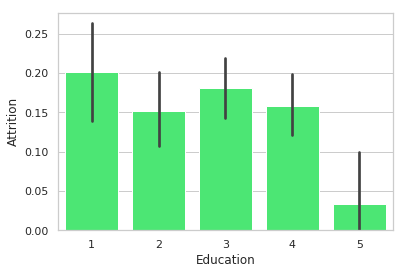

In [33]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('Education', 'Attrition', data=train, color="#33FF68")
plt.show()

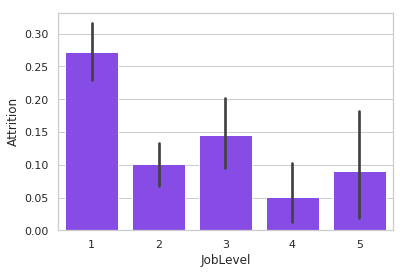

In [34]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot('JobLevel', 'Attrition', data=train, color="#8333FF")
plt.show()

In [35]:
# Calculation of the correlation coefficients in pairs, with the default method:
# Pearson, Standard Correlation Coefficient
train_corr = train.corr()
# Retrieving the correlation coefficients per feature in relation to the feature class
rank = train_corr['Attrition'] 
train_rank = pd.DataFrame(rank) 
# Ranking the absolute values of the coefficients in descending order
train_rank = np.abs(train_rank).sort_values(by='Attrition',ascending=False) 
train_rank

,Attrition
Attrition,1.000000
TotalWorkingYears,0.178842
JobLevel,0.169121
Age,0.168641
MonthlyIncome,0.163709
StockOptionLevel,0.160597
YearsInCurrentRole,0.159691
JobInvolvement,0.158768
YearsWithCurrManager,0.151208
YearsAtCompany,0.133021


In [36]:
X = train.drop(["Attrition", "Gender", "EmployeeCount", "EmployeeNumber", "HourlyRate", "ID", "MonthlyRate", "RelationshipSatisfaction", "DailyRate", "PerformanceRating", "PercentSalaryHike", "Education", "TrainingTimesLastYear"], axis=1)
X_test = test.drop(["Gender", "EmployeeCount", "EmployeeNumber", "HourlyRate", "ID", "MonthlyRate", "RelationshipSatisfaction", "DailyRate", "PerformanceRating", "PercentSalaryHike", "Education", "TrainingTimesLastYear"], axis=1)
y = train["Attrition"]

In [37]:
# convert objects to numbers by pandas.get_dummies
X = pd.get_dummies(X, columns=["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "OverTime"])
X_test = pd.get_dummies(X_test, columns=["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "OverTime"])

In [38]:
# Scale the training data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [39]:
# Scale the test data to be between -1 and 1
scaler = StandardScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [40]:
svc = SVC(kernel = 'rbf', C = 29, gamma = 0.001)
svc.fit(X,y)
y_pred = svc.predict(X_test)
res = pd.DataFrame({"ID": test["ID"], "Attrition": y_pred})
np.sum(y_pred)

39

In [41]:
with open('output.csv', 'w') as csv_file:
    res.to_csv(path_or_buf=csv_file, index = False)

In [42]:
# Splitting dataset into training set and validation set for better generalisation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:
svc=SVC(kernel = 'rbf', C = 29, gamma = 0.001) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_validation)
print('Accuracy Score:')
print(metrics.accuracy_score(y_validation,y_pred))

Accuracy Score:
0.9029126213592233


In [44]:
svc=SVC(kernel='poly', C = 11, gamma = 0.01, degree = 1) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_validation)
print('Accuracy Score:')
print(metrics.accuracy_score(y_validation,y_pred))

Accuracy Score:
0.9174757281553398


In [45]:
svc=SVC(kernel='linear', C = 20, gamma = 0.01) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_validation)
print('Accuracy Score:')
print(metrics.accuracy_score(y_validation,y_pred))

Accuracy Score:
0.9174757281553398


In [46]:
svc=SVC(kernel='sigmoid', C = 5, gamma = 0.01) 
svc.fit(X_train,y_train)
y_pred=svc.predict(X_validation)
print('Accuracy Score:')
print(metrics.accuracy_score(y_validation,y_pred))

Accuracy Score:
0.9223300970873787


In [47]:
# gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
# param_grid = {'C':np.arange(1,50), 'gamma':gamma_range}
# svc = SVC()
# svc_cv = GridSearchCV(svc,param_grid,cv=5)
# svc_cv.fit(X,y)
# svc_cv.best_score_
# svc_cv.best_params_

In [48]:
# gamma_range=[0.01,0.1,1]
# param_grid = {'C':np.arange(0.1,20), 'gamma':gamma_range, 'degree': np.arange(0,3)}
# svc = SVC(kernel='poly')
# svc_cv = GridSearchCV(svc,param_grid,cv=5)
# svc_cv.fit(X,y)
# svc_cv.best_score_
# svc_cv.best_params_

In [49]:
# gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
# param_grid = {'C':np.arange(1,50), 'gamma':gamma_range}
# svc = SVC(kernel='linear')
# svc_cv = GridSearchCV(svc,param_grid,cv=5)
# svc_cv.fit(X,y)
# svc_cv.best_score_
# svc_cv.best_params_

In [50]:
# gamma_range=[0.0001,0.001,0.01,0.1,1,10,100]
# param_grid = {'C':np.arange(1,50), 'gamma':gamma_range}
# svc = SVC(kernel='sigmoid')
# svc_cv = GridSearchCV(svc,param_grid,cv=5)
# svc_cv.fit(X,y)
# svc_cv.best_score_
# svc_cv.best_params_